In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
for dirname, _, filenames in os.walk('/Machine algoritms with python/introduction to deep learning'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Machine algoritms with python/introduction to deep learning\2d-datasets-classification.zip
/Machine algoritms with python/introduction to deep learning\target.npy
/Machine algoritms with python/introduction to deep learning\train.npy
/Machine algoritms with python/introduction to deep learning\Untitled.ipynb
/Machine algoritms with python/introduction to deep learning\.ipynb_checkpoints\Untitled-checkpoint.ipynb
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_1.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_2.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_3.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_4.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_5.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_6.csv
/Machine algoritms with python/introduction to deep learning\

In [9]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
with open('target.npy', 'rb') as fin:
    y = np.load(fin)
    


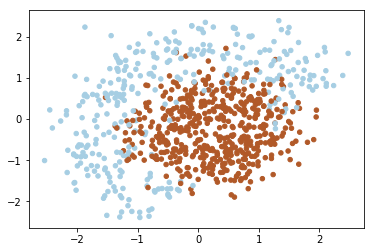

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

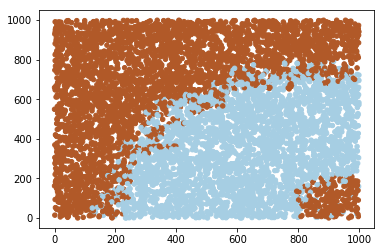

In [26]:
file = "datasets\\2d_dataset_8.csv"
df = pd.read_csv(file)
plt.scatter(df.alpha, df.beta, c=df.y, cmap=plt.cm.Paired, s=20)
plt.show()